In [1]:
%pylab nbagg
from sympy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *
%matplotlib inline
from numpy import *
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

Populating the interactive namespace from numpy and matplotlib


In [2]:
R = 1000
l = Symbol('l')
omega = 0.18
T = 2000

In [3]:
def dy_dt(y, t, omega, fcf):
    y1, y2, y3, y4 = y
    
    eps = 1e-12
    
    if abs(y1) < eps:
        y1 = eps
        
    dydt = [y2, 2.*omega*y1*y4+y1*(fcf*omega**2+y4**2),\
            y4, -(2.*y2/y1)*(omega+y4)]
    
    return dydt
    

In [4]:


fcf = 1. # the centrifugal force is included

# (a1) the ball returns to the pitcher
y0 = [R, -omega*R, 0., -omega]

# the integration time interval
t_start = 0.
t_end = 100. # adjust t_end using the plot below
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

In [5]:
sol = odeint(dy_dt, y0, t, args=(omega,fcf))


In [6]:
height = []
radius = sol[1,0]
k = 0
while abs(radius) < R and k < nt-1:
    k += 1
    radius = sol[k,0]



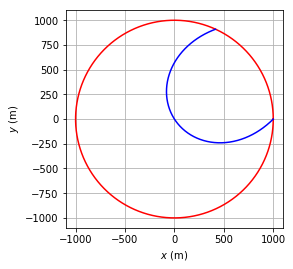

In [7]:
figure(1)

ax = axes()

ncirc = 6120
phi = linspace(0,2.*pi,ncirc)
xcirc = linspace(0,0,ncirc)
ycirc = linspace(0,0,ncirc)

for icirc in range(ncirc):
    xcirc[icirc] = R*cos(phi[icirc])
    ycirc[icirc] = R*sin(phi[icirc])
    
ax.set_aspect(1)

plot(xcirc, ycirc, 'r')
plot(sol[0:k,0]*cos(sol[0:k,2]), sol[0:k,0]*sin(sol[0:k,2]), 'b')
xlabel('$x\ (\mathrm{m})$')
ylabel('$y\ (\mathrm{m})$')
grid()
show()

In [8]:
def intersection():
    '''Finds where the blue line intersects the red line again after the flight path. '''
    x_hit = numpy.where(xcirc < xtraj[-1])[0] 
    y_hit = numpy.where(ycirc > ytraj[-1])[0] 
    for x in x_hit:
        for y in y_hit: 
            if x == y:
                return x

In [9]:
xtraj = sol[0:k,0]*cos(sol[0:k,2])
ytraj = sol[0:k,0]*sin(sol[0:k,2])

In [10]:
i = intersection()
xcirc_new = xcirc[0:i]
ycirc_new = ycirc[0:i]


In [11]:
height = []
for j in range(0,len(xtraj)):
    height.append( sqrt( (xtraj[j]-xcirc_new[j])**2 + (ytraj[j]-ycirc_new[j])**2))

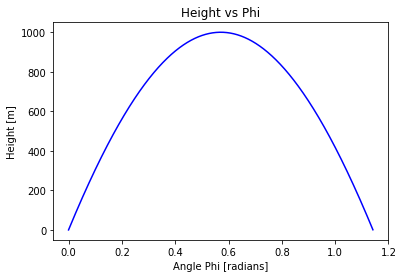

In [12]:
phi_range = np.linspace(0,(1112/ncirc)*2.*pi, 1112) 
plot(phi_range, height, 'b')
xlabel("Angle Phi [radians]")
ylabel("Height [m]")
title("Height vs Phi")
show()

Part B)

We want a straight line for the observer in the non-inertial frame as once the object is released it goes off linearly because it doesn't have any forces acting on it. 


In [70]:
##Velocity when the projectile leaves is -omega*R upwards and omega*R linear.  



In [100]:
x = linspace(0, 1000)

(-1099.9958021139898,
 1099.9998001006661,
 -1099.998950527973,
 1099.9999500251415)

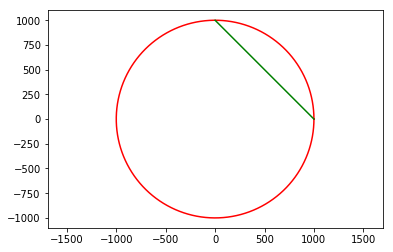

In [101]:
plot(xcirc, ycirc, 'r')
plot(x, -1*x+1000, 'g') ##Graph of straight line from non-inertial viewer

ax.set_aspect(1)
plt.axis('equal')